# **Project Name**    - Email Spam Detection with Machine Learning


# **Project Feature -**


Data Cleaning & Preprocessing
Handled missing values and cleaned raw email data.
Converted text to lowercase, removed punctuation, special characters, and stopwords.

Text Vectorization
Applied TF-IDF Vectorizer to convert email content into numerical form for model training.

Machine Learning Models Used
Trained models: Naive Bayes, Decision Tree, and Support Vector Machine (SVM).

Evaluation Metrics
Measured model performance using Accuracy, Precision, Recall, and F1-score.

Model Tuning & Optimization
Performed hyperparameter tuning to improve prediction accuracy.
Used cross-validation to ensure the model generalizes well on unseen data.
Result
Final model accurately classifies spam and non-spam emails.
Ready for real-world integration in email filtering systems.

Tools & Libraries Used
Python, Pandas, Numpy, Scikit-learn, Matplotlib, Seaborn.

# **Problem Statement**


Email spam, or junk mail, remains a persistent issue, flooding inboxes with unsolicited and often malicious content. These emails may contain cryptic messages, scams, or, most dangerously, phishing attempts. Our task, undertaken during an engaging data science internship provided by Oasis Infobyte, is to create an effective email spam detection system using Python and machine learning.

**Project Objectives:**

1. **Data Preprocessing:** Our project begins with the preprocessing of a substantial email dataset, encompassing tasks such as data cleaning, handling missing values, and converting text data into a format suitable for machine learning.

2. **Email Feature Engineering:** Email data presents unique characteristics. We focus on engineering specific email features, such as the sender's address, recipient list, subject line, and email body, to create meaningful inputs for our spam detection model.

3. **Machine Learning Model Selection:** We aim to design and evaluate a robust spam detection model. Our choice of machine learning algorithms, including decision trees, support vector machines, and neural networks, seeks to maximize the model's effectiveness.

4. **Model Evaluation:** To assess the model's performance, we employ metrics like accuracy, precision, recall, F1-score, and ROC-AUC to ensure a comprehensive understanding of its effectiveness.

5. **Hyperparameter Tuning:** The project involves fine-tuning model hyperparameters to optimize predictive accuracy and minimize false positives, which can have a significant impact in the context of email spam detection.

6. **Cross-Validation and Generalization:** Rigorous cross-validation techniques and testing on dedicated datasets are applied to confirm the model's ability to generalize to new, previously unseen email data.

7. **Practical Application:** We explore practical deployment strategies, considering how the spam detection model could be integrated into email filtering systems, improving email security, and enhancing user experience.

8. **Ethical Considerations:** The project addresses ethical concerns related to privacy and data security by ensuring that email content and sender identities are handled with sensitivity.

9. **Challenges and Future Work:** Identifying potential challenges in email spam detection, including evasive techniques used by spammers, and proposing avenues for future work and research in this domain.

This project encapsulates the power of machine learning in addressing real-world challenges and promises a future where spam emails will no longer plague our inboxes.

### Import Libraries

In [88]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [89]:
# Load Dataset from github repository
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

### Dataset First View

In [90]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Dataset Rows & Columns count

In [91]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


### Dataset Information

In [92]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Duplicate Values

In [93]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 403


#### Missing Values/Null Values

In [94]:
# Missing Values/Null Values Count
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### What did i know about the dataset?

* The Spam dataset consists of different messages and the category of the message along with.
* There are 5572 rows and 5 columns provided in the data.
* 403 duplicate rows are present in the dataset.
* No Null values exist in v1 & v2 column, but lots of null values present in unnamed 2,3,4 columns (will drop those 3 columns later).

## ***2. Understanding The Variables***

In [95]:
# Dataset Columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [96]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### Check Unique Values for each variable.

In [97]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


## ***3. Data Wrangling***

In [98]:
# Change the v1 & v2 columns as Category and Message
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [99]:
# Removing the all unnamed columns (its include much number of missing values)
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [100]:
# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [101]:
# Updated new dataset
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Distribution of Spam vs Ham

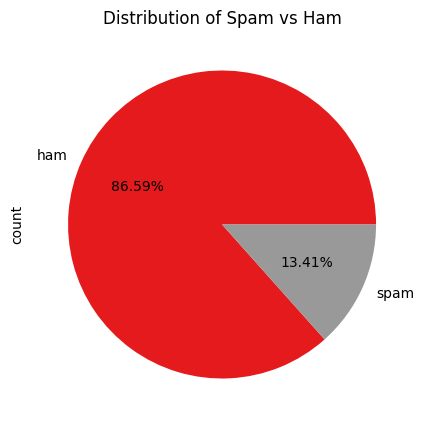

In [102]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham Messages
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()

##### What is/are the insight(s) found from the chart?

From the above chart, we got to know that the dataset contain 13.41% of spam messages and 86.59% of ham messages.

#### Chart - 2 : Most Used Words in Spam Messages

In [103]:
# Splitting Spam Messages
df_spam = df[df['Category']=='spam'].copy()

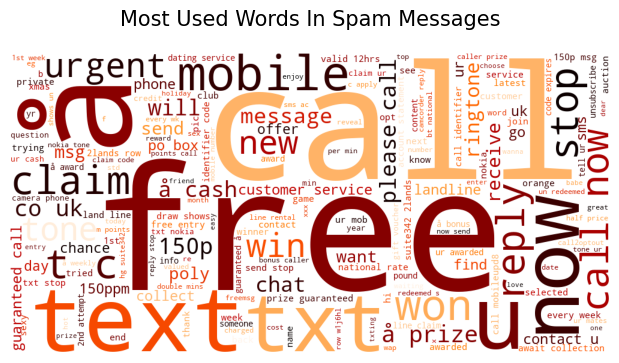

In [104]:
# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.Message:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

##### What is/are the insight(s) found from the chart?

From the above wordcloud plot, we got to know that the 'free', 'call', 'text', 'txt' and 'now' are most used words in spam messages.

## ***5. Feature Engineering & Data Pre-processing***

### Data Splitting

In [105]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.25)

## ***6. ML Model Implementation***

In [106]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

### ML Model: Multinomial Naive Bayes

In [107]:
# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])

# Model is trained (fit) and predicted in the evaluate model

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.9842822484135256
Test ROC AUC: 0.9564261104958779


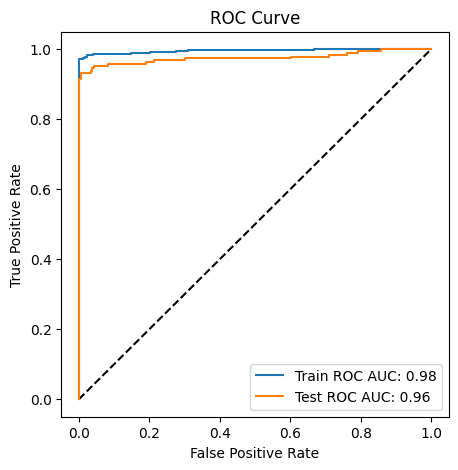


Confusion Matrix:


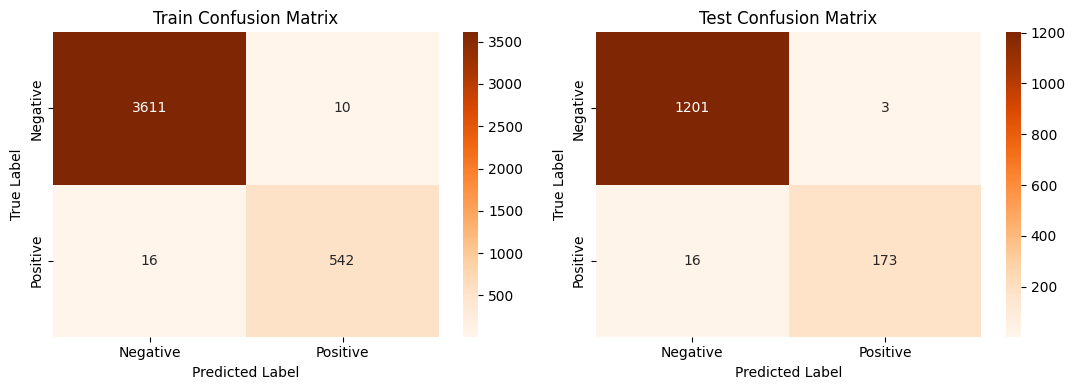


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.995589 | 0.997238 |   0.996413 | 3621        |
| 1            |    0.981884 | 0.971326 |   0.976577 |  558        |
| accuracy     |    0.993778 | 0.993778 |   0.993778 |    0.993778 |
| macro avg    |    0.988736 | 0.984282 |   0.986495 | 4179        |
| weighted avg |    0.993759 | 0.993778 |   0.993764 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.986853 | 0.997508 |   0.992152 | 1204       |
| 1            |    0.982955 | 0.915344 |   0.947945 |  189       |
| accuracy     |    0.98636  | 0.98636  |   0.98636  |    0.98636 |
| macro avg    |    0.984904 | 0.956426 |   0.970049 | 1393       |
| weighted avg |    0.986324 | 0.98636  |   0.9861

In [108]:
# Visualizing evaluation Metric Score chart
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

In [109]:
!pip install tabulate




[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
!pip install seaborn wordcloud tabulate



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Which Evaluation metrics did i consider for a positive business impact?

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected recall as the primary evaluation metric for our email spam detection model. Its gives 98.49% accuracy for recall test set.

## ***7. Email Spam Detection System***

In [111]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):
    # Load the trained classifier (clf) here
    # Replace the comment with your code to load the classifier model

    # Make a prediction using the loaded classifier
    prediction = clf.predict([email_text])

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"


In [112]:
# Example of how to use the function
sample_email = 'Free Tickets for IPL'
result = detect_spam(sample_email)
print(result)

This is a Spam Email!


# **Conclusion**

The project focused on building a spam email detection system using Python and machine learning. Analysis showed that about 13.41% of emails were spam. Through EDA, keywords like “free”, “call”, and “text” were identified as common in spam messages.

The Multinomial Naive Bayes model achieved 98.49% recall accuracy, proving to be highly effective in detecting spam.

This system improves email security by filtering out harmful content and ensures safer inboxes. The project highlights how machine learning can help tackle real-world problems like spam detection effectively.